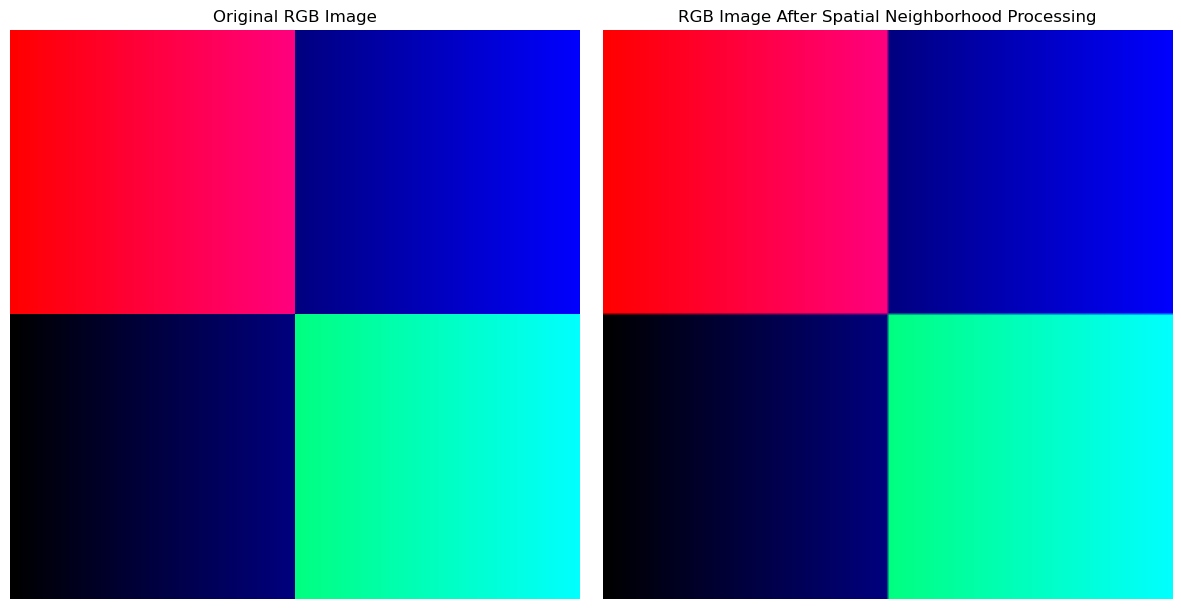

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ===========================================================
# Concept of Spatial Neighborhood Processing
# ===========================================================
# Spatial Neighborhood Processing involves applying a filter or transformation 
# to a pixel based on the values of its neighboring pixels. 
# For grayscale images, this typically uses a 2D kernel, where each pixel is 
# processed by considering a window (a set of surrounding pixels) around it.
#
# In the case of RGB images, this extends to 3D neighborhoods (voxels), 
# where the kernel operates on the pixel's RGB values along with its neighbors. 
#
# This approach is used for tasks such as noise reduction, image blurring, edge detection, 
# and enhancement of specific features based on local spatial patterns.
#
# The steps performed in this approach are:
# 1. Load a grayscale or RGB image.
# 2. Define a kernel (e.g., a 3x3 kernel) that will be applied to each pixel and its neighborhood.
# 3. Apply the kernel to each pixel’s neighborhood, transforming the pixel values based on its surrounding context.
# 4. Visualize the result and compare the original and processed images.
#
# Example: In the given program, a 3x3 kernel (a simple averaging filter) 
# is applied to an RGB image, demonstrating the concept of spatial neighborhood processing.
# ===========================================================

# Define the data directory
data_dir = os.path.join(os.getcwd(), 'data', 'images')

# Load grayscale components and combine them into an RGB image
R = cv2.imread(os.path.join(data_dir, 'red_band.jpg'), cv2.IMREAD_GRAYSCALE)
G = cv2.imread(os.path.join(data_dir, 'green_band.jpg'), cv2.IMREAD_GRAYSCALE)
B = cv2.imread(os.path.join(data_dir, 'blue_band.jpg'), cv2.IMREAD_GRAYSCALE)

if R is None or G is None or B is None:
    raise FileNotFoundError(f"Ensure all R, G, and B band images are available in {data_dir}.")

# Combine the three components into an RGB image
rgb_image = cv2.merge([B, G, R])

# ===========================================================
# Apply Spatial Neighborhood Processing
# ===========================================================
# Define a 3x3 kernel for averaging (blurring)
kernel = np.ones((3, 3), np.float32) / 9

# Apply the kernel to the RGB image using filter2D
# filter2D performs convolution, considering the 2D neighborhood around each pixel
rgb_image_processed = cv2.filter2D(rgb_image, -1, kernel)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_image_processed, cv2.COLOR_BGR2RGB))
plt.title("RGB Image After Spatial Neighborhood Processing")
plt.axis('off')

plt.tight_layout()
plt.show()
